In [1]:
#meta 3/27 Spearman's Rank-Order Correlation
#references
#https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide.php
#https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import scipy.stats as ss


# Spearman's Rank-Order Correlation
aka Spearman's Correlation Coefficient

A statistical procedure that is designed to measure the strength and direction of monotonic association between two ranked variables. Monotonic means an increasing or decreasing relationship.  Monotonicity is "less restrictive" than that of a linear relationship. For example, the middle image above shows a relationship that is monotonic, but not linear.

![Monotonic Relationship](images/monotonic.png)

https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/  
The intuition for the Spearman’s rank correlation is that it calculates a Pearson’s correlation (e.g. a parametric measure of correlation) using the rank values instead of the real values. Where the Pearson’s correlation is the calculation of the covariance (or expected difference of observations from the mean) between the two variables normalized by the variance or spread of both variables.

Spearman’s rank correlation can be calculated in Python using the `spearmanr() SciPy function`:
> coef, p = spearmanr(data1, data2)  
Returns both the correlation coefficient in the range between -1 and 1 and the p-value for interpreting the significance of the coefficient.

## 1. Spearman's correlation without tied ranks
#### Definition
- without tied ranks
![Formula 1](images/rho_no_tied_ranks.jpg)


In [3]:
#sample input without identical scores
x1 = np.array([56,75,45,71,62,64,58,80,76,61])
x2 = np.array([66,70,40,60,65,56,59,77,67,63])


In [4]:
# calculate spearman's correlation with Scipy
coef, p = spearmanr(x1, x2)
print('Spearmans correlation coefficient: %.4f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.4f' % p)
else:
    print('Samples are correlated (reject H0) p=%.4f' % p)

Spearmans correlation coefficient: 0.6727
Samples are correlated (reject H0) p=0.0330


### my Rho

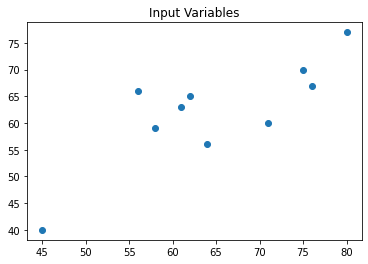

In [5]:
#visualize
plt.scatter(x1,x2);
plt.title("Input Variables");

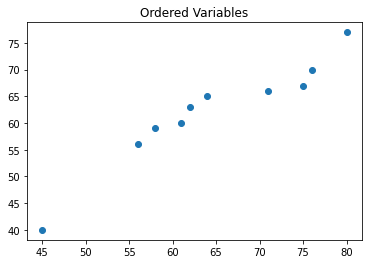

In [6]:
#vis ordered
plt.scatter(sorted(x1),sorted(x2));
plt.title("Ordered Variables");

#### Rank data
from highes to lowest, no identical scores => no tie

In [7]:
#need to rank
#ss.rankdata(x1), len(x1)+1 - ss.rankdata(x1)

x1_ranked = len(x1)+1 - ss.rankdata(x1)
x2_ranked = len(x2)+1 - ss.rankdata(x2)

x1_ranked, x2_ranked

(array([ 9.,  3., 10.,  4.,  6.,  5.,  8.,  1.,  2.,  7.]),
 array([ 4.,  2., 10.,  7.,  5.,  9.,  8.,  1.,  3.,  6.]))

In [8]:
sorted(x1_ranked), sorted(x2_ranked)

([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
 [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])

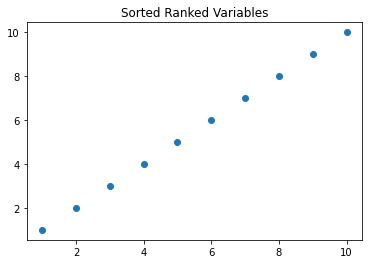

In [9]:
#vis ranked
plt.scatter(sorted(x1_ranked), sorted(x2_ranked));
plt.title("Sorted Ranked Variables");

In [10]:
# manually: Spearman's correlation without tied ranks
def rho1(x1,x2) -> np.float32:
    
    _n = len(x1)
    
    #rank input vars
    _x1_rank = len(x1)+1 - ss.rankdata(x1)
    _x2_rank = len(x2)+1 - ss.rankdata(x2)
    #print(_x1_rank, _x2_rank)
    
    #calc distance, squared distance
    _d = _x1_rank - _x2_rank
    _d_sqrd = _d**2
    #print(_d, _d_sqrd, _d_sqrd.sum())
    
    nom = 6 * _d_sqrd.sum()
    denom = _n * (_n**2 -1)
    #print(nom, denom)
    
    return (1 - (nom/denom))

rho1(x1,x2)

0.6727272727272727

## 2. Spearman's correlation with tied ranks
#### Definition
- with tied ranks
![Formula 2](images/rho_tied_ranks.jpg)

In [11]:
#sample input with identical scores
x1 = np.array([56,75,45,71,61,64,58,80,76,61])
x2 = np.array([66,70,40,60,65,56,59,77,67,63])


In [12]:
# calculate spearman's correlation with Scipy
coef, p = spearmanr(x1, x2)
print('Spearmans correlation coefficient: %.4f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.4f' % p)
else:
    print('Samples are correlated (reject H0) p=%.4f' % p)

Spearmans correlation coefficient: 0.6687
Samples are correlated (reject H0) p=0.0345


### my Rho

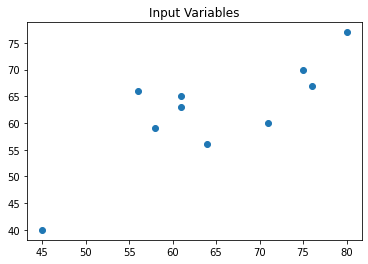

In [13]:
#visualize
plt.scatter(x1,x2);
plt.title("Input Variables");

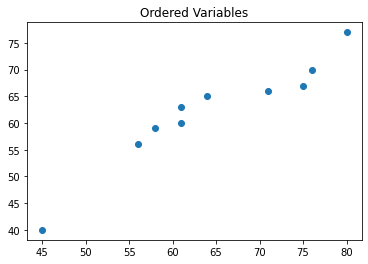

In [14]:
#vis ordered
plt.scatter(sorted(x1),sorted(x2));
plt.title("Ordered Variables");

#### Rank data
from highes to lowest, tie for identical scores

In [15]:
#need to rank
#ss.rankdata(x1), len(x1)+1 - ss.rankdata(x1)

x1_ranked = len(x1)+1 - ss.rankdata(x1)
x2_ranked = len(x2)+1 - ss.rankdata(x2)

x1_ranked, x2_ranked

(array([ 9. ,  3. , 10. ,  4. ,  6.5,  5. ,  8. ,  1. ,  2. ,  6.5]),
 array([ 4.,  2., 10.,  7.,  5.,  9.,  8.,  1.,  3.,  6.]))

In [16]:
sorted(x1_ranked), sorted(x2_ranked)

([1.0, 2.0, 3.0, 4.0, 5.0, 6.5, 6.5, 8.0, 9.0, 10.0],
 [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])

Text(0.5, 1.0, 'Sorted Ranked Variables')

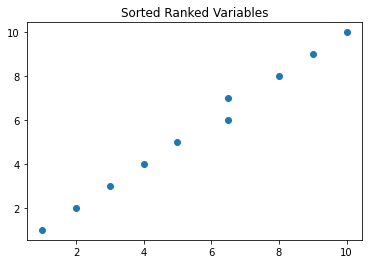

In [17]:
#vis ranked
plt.scatter(sorted(x1_ranked), sorted(x2_ranked));
plt.title("Sorted Ranked Variables")

In [18]:
def rho2(x1,x2) -> np.float32:
    #rank input vars
    _x1_rank = len(x1)+1 - ss.rankdata(x1)
    _x2_rank = len(x2)+1 - ss.rankdata(x2)
    #print(_x1_rank, _x2_rank)
    
    #calc mean ranking
    _mean_x1_rank = _x1_rank.mean()
    _mean_x2_rank = _x2_rank.mean()
    #print(_mean_x1_rank, _mean_x2_rank)
    
    #calc distance (rank - mean rank)
    _d_x1 = _x1_rank - _mean_x1_rank
    _d_x2 = _x2_rank - _mean_x2_rank
    #print(_d_x1, _d_x2)
    
    #nominator
    nom = (_d_x1 * _d_x2).sum()
    #denominator
    denom = np.sqrt((_d_x1**2).sum() * (_d_x2**2).sum())
    #print(nom, denom)
    
    return nom / denom

rho2(x1,x2)

0.6686960980480711

## 3. Interpreation
The statistical test reports a positive correlation with a value of 0.67. The p-value is lower than `alpha=0.05`, which means that the likelihood of observing the data given that the samples are uncorrelated is unlikely (e.g. 95% confidence) and that we can reject the null hypothesis that the samples are uncorrelated.